In [2]:
import pandas as pd
import numpy as np

In [3]:
# Set seed to create pseudo-randomness
np.random.seed(416)

# Load in the data and preview it
sales = pd.read_csv('home_data.csv') 
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Q1) Exploring the data

a) How many houses do we have in our data set? This should correspond to the number of rows in the dataset. Save the number of rows in a variable called `num_rows`.

*Hint:* You can use `len()` to get the length of anything in Python. Note that when you use it on a DataFrame, it will give you the number of rows, not columns.

In [4]:
y = sales['price']
print(y)

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64


In [5]:
input_dimensions = sales.shape[1]-1
print(input_dimensions)

20


## Q2) What is the average (mean) price of houses with 3 bedrooms?

Compute the average (mean) price of houses in the dataset with 3 bedrooms. Save the result in `avg_price_3_bed`.

In [6]:
avg_price_3_bed = sales[sales['bedrooms']==3]['price'].mean()
print(avg_price_3_bed)

466232.07949918567


## Q3) What fraction of the properties are have `sqft_living` between 2000-4000?

Compute the fraction of properties with `sqft_living` between 2000 (inclusive) and 4000 (exclusive). Your answer should be stored in `percent_q3` and it should be a number between 0 and 1.

In [7]:
percent_q3 = len(sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] < 4000)]) / len(sales)
print(percent_q3)

0.4263174941007727


## Q4) Training a Linear Regression Model.

We will now train a linear regression model to make useful predictions. Work through the steps below and then answer the following questions. Even though a lot of the code is pre-written, you should understand what it is doing! You may be asked to write some of this code on future assignments.

First we split the data into a training set and a validation set.

In [10]:
from sklearn.model_selection import train_test_split

# Split data into 70% train, 15% validation, and 15% test
train_data, val_and_test_data = train_test_split(sales, test_size=0.3)
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5) # 50% of 30% is 15%

Text(0, 0.5, 'Price')

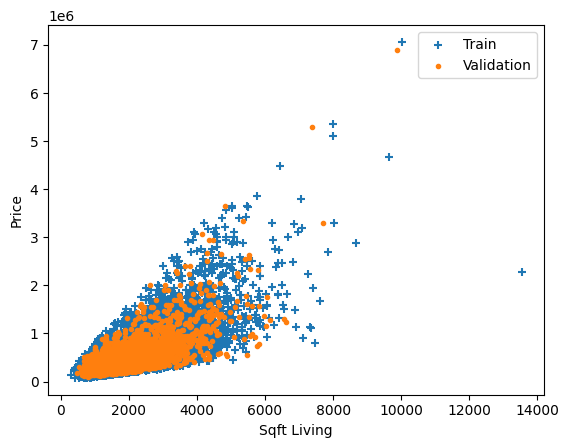

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sqft_living vs housing price for the train and val dataset
plt.scatter(train_data['sqft_living'], train_data['price'], marker='+', label='Train')
plt.scatter(val_data['sqft_living'], val_data['price'], marker='.', label='Validation')

# Code to customize the axis labels
plt.legend()
plt.xlabel('Sqft Living')
plt.ylabel('Price')

In [12]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [13]:
advanced_features = basic_features + [
    'condition',      # condition of the house
    'grade',          # measure of qality of construction
    'waterfront',     # waterfront property 
    'view',           # type of view
    'sqft_above',     # square feet above ground
    'sqft_basement',  # square feet in basementab
    'yr_built',       # the year built
    'yr_renovated',   # the year renovated
    'lat',            # the longitude of the parcel
    'long',           # the latitide of the parcel
    'sqft_living15',  # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15',     # average lot size of 15 nearest neighbors 
]

In [14]:
from sklearn.linear_model import LinearRegression

basic_model = LinearRegression()
x = train_data[basic_features]
basic_model.fit(x, train_data['price'])

advanced_model = LinearRegression()
x2 = train_data[advanced_features]
advanced_model.fit(x2, train_data['price'])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Q5) What is the Root Mean Squared Errors (RMSE) on the training data using the basic model and the advanced model?


Use the models you trained in last question to predict what it thinks the values for the data points should be. You can look at the documentation from the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class to see how to make predictions. 

The RMSE is another commonly reported metric used for regression models. The RMSE is similar to MSE but is modified slightly to scale the number down. The RMSE is defined as $$RMSE = \sqrt{MSE}$$

In [15]:
from sklearn.metrics import mean_squared_error

basic_pred = basic_model.predict(x)
advanced_pred = advanced_model.predict(x2)

train_rmse_basic = np.sqrt(mean_squared_error(train_data['price'], basic_pred))
train_rmse_advanced = np.sqrt(mean_squared_error(train_data['price'], advanced_pred))

print(f"Basic model RMSE: {train_rmse_basic}")
print(f"Advanced model RMSE: {train_rmse_advanced}")

Basic model RMSE: 251864.48365920992
Advanced model RMSE: 194917.64582328583


## Q6) What is the RMSE on the validation data using the basic model and the advanced model?

In [16]:
basic_pred1 = basic_model.predict(val_data[basic_features])
advanced_pred1 = advanced_model.predict(val_data[advanced_features])

val_rmse_basic = np.sqrt(mean_squared_error(val_data['price'], basic_pred1))
val_rmse_advanced = np.sqrt(mean_squared_error(val_data['price'], advanced_pred1))

print(f"Basic model RMSE: {val_rmse_basic}")
print(f"Advanced model RMSE: {val_rmse_advanced}")

Basic model RMSE: 257520.93898446456
Advanced model RMSE: 205069.48456592468


## Q7) What is the test error for the better model?

Using your validation errors, determine which model is better. For the better model, compute its test error, and store it in a variable `test_rmse`.

In [17]:
basic_pred2 = basic_model.predict(test_data[basic_features])
advanced_pred2 = advanced_model.predict(test_data[advanced_features])

test_rmse = None

if val_rmse_basic < val_rmse_advanced:
    test_rmse = np.sqrt(mean_squared_error(test_data['price'], basic_pred2))
else:
    test_rmse = np.sqrt(mean_squared_error(test_data['price'], advanced_pred2))

print(f'Test RMSE: {test_rmse}')

Test RMSE: 225913.14562318067
